# Preprocessing


## 3.1 Scaling

- StandardScaler: Ensures mean=0 and variance=1, bringing all features to the same magnitude. Does not ensure any particular min and max values for the features
- RobusrScaler: Similar to StandardScaler, but it uses median and quartiles, ignoring points that are too different from the others (outliers)
- MinMaxScaler: Ensures all points will be between 0 and 1.
- Normaliser: Scales each data point such as the feature vector has an Euclidian distance of 1. Often used when only the direction (or angle) of the data matters, not the lenght of the feature vector.


**YOU NEED TO APPLY EXACTLY THE SAME TRANSFORMATION TO THE TRAINING AND TEST SET**


Example on how to do it:

````
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

````




In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split (cancer.data, cancer.target, random_state=1)

print(f"Shape of X_train, before scaling {X_train.shape}")
print(f"Shape of X_test, before scaling {X_test.shape}")

print(f"Max and Min values of X_train, before scaling \n MAX {X_train.max(axis=0)}, MIN {X_train.min(axis=0)}")

# We need to import the class that implements the preprocessing and then instantiate it
scaler = MinMaxScaler()
scaler.fit(X_train) # you do this 'fit' only once, with the training set

# then we proceed with the transformations
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We could also do the fit and transform in one go
# X_train_scaled = scaler.fit_transform(X_train)
# or, less efficient, but also works the same
# X_train_scaled = scaler.fit(X_train).transform(X_train)


print(f"Max and Min values of X_train, after scaling \n MAX {X_train_scaled.max(axis=0)}, MIN {X_train_scaled.min(axis=0)}")



Shape of X_train, before scaling (426, 30)
Shape of X_test, before scaling (143, 30)
Max and Min values of X_train, before scaling 
 MAX [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01], MIN [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Max and Min values of X_train, after scaling 
 MAX [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.], MIN [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [2]:
#EXAMPLE ON HOW TO APPLY IN THE CANCER DS
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)

#pre-processing
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)


#scoring on the scaled data set
print(f"Scaled train accuracy: {svm.score(X_train_scaled, y_train):.2f}")
print(f"Scaled test accuracy: {svm.score(X_test_scaled, y_test):.2f}")



Scaled train accuracy: 1.00
Scaled test accuracy: 0.97


## 3.2 PCA (Principal component analysis)

Select features that are most important in the data. Used especially to be able to visualise data.
In essence, PCA "rotates the data" and remove components with low variance.


- To apply PCA we need to scale our data
- We need to create a PCA object and inform how many components we want to keep
- The components are combinations of the features, and therefore, not easy to intepret. 

*For example, in the example below, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.*

*Another example, for both PCA and the NMF below. Let's suppose we are working with images. So the image A can be reconstructed by summing all the components x1, x2, x3 .... Xn. It's as if each component is a part of the image.*

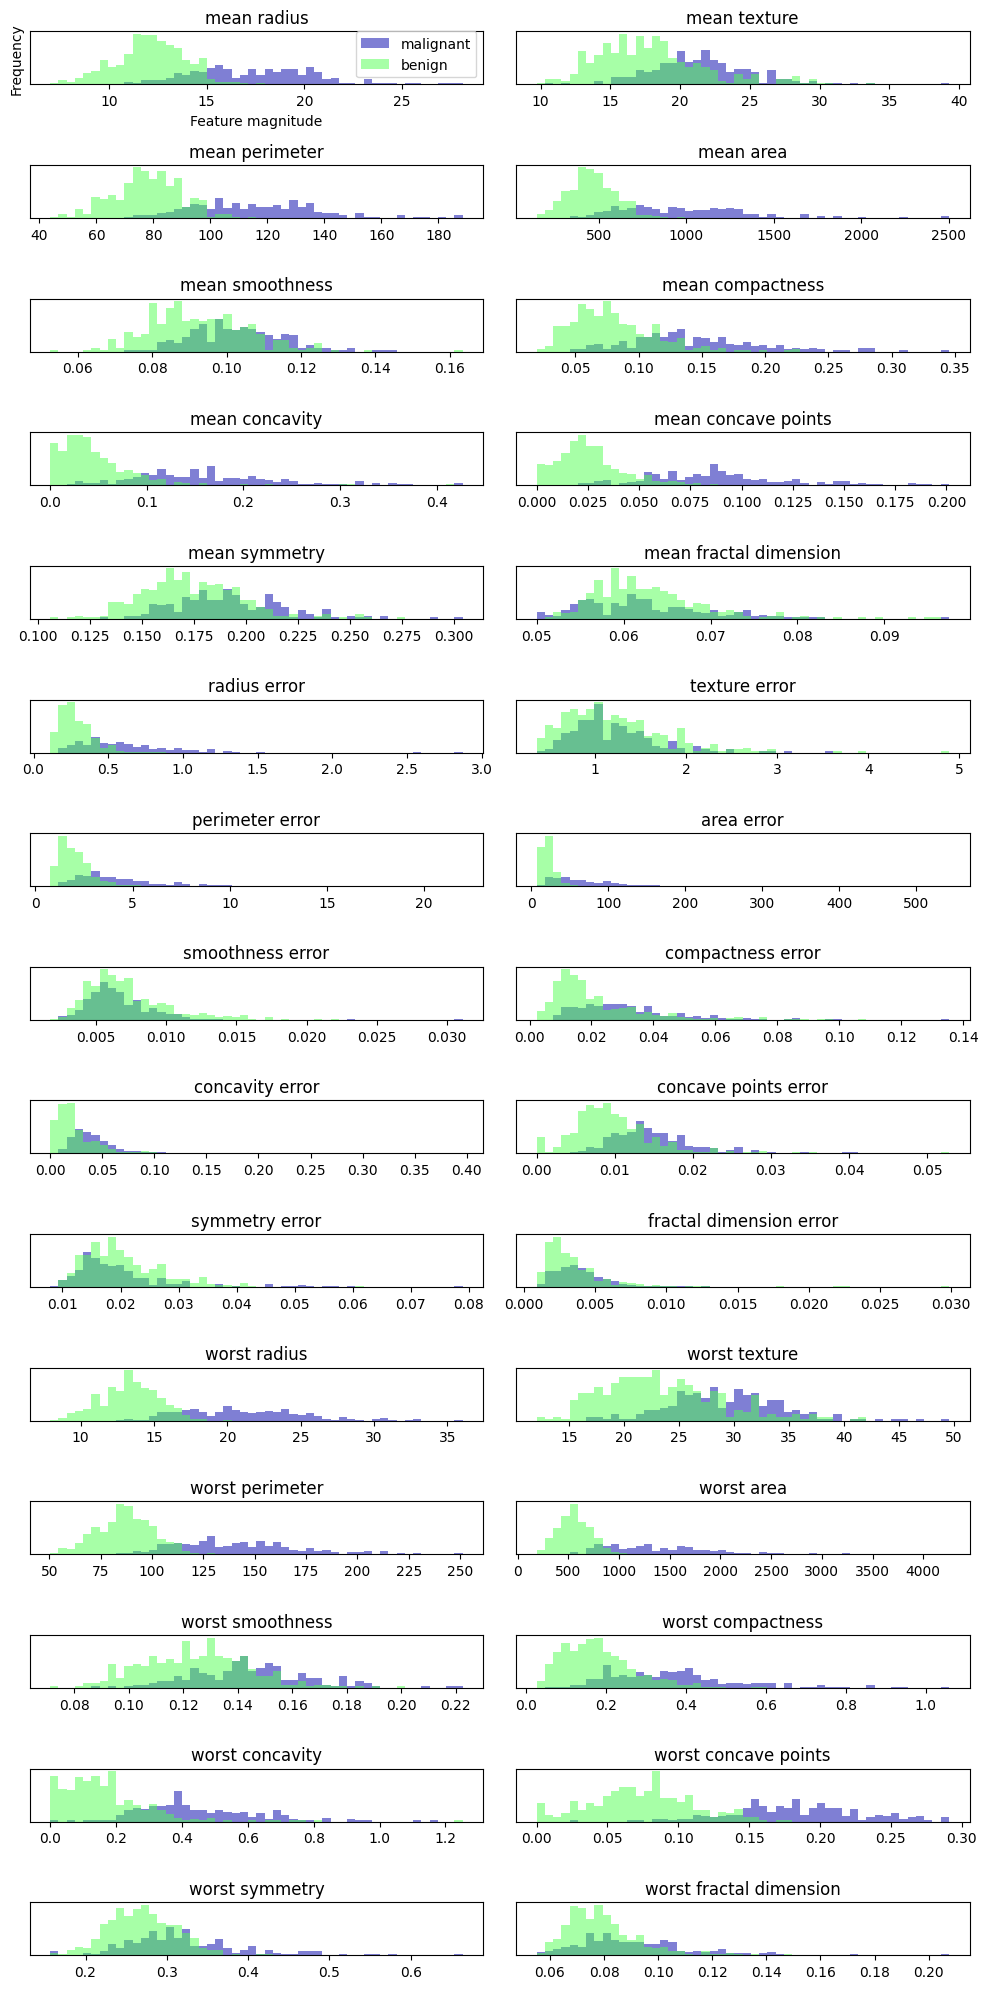

In [3]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axes= plt.subplots(15, 2, figsize=(10,20))

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30): #range 30 because of the number of features
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Original shape: (569, 30)
Shape after PCA: (569, 2)


Text(0, 0.5, 'Second principal component')

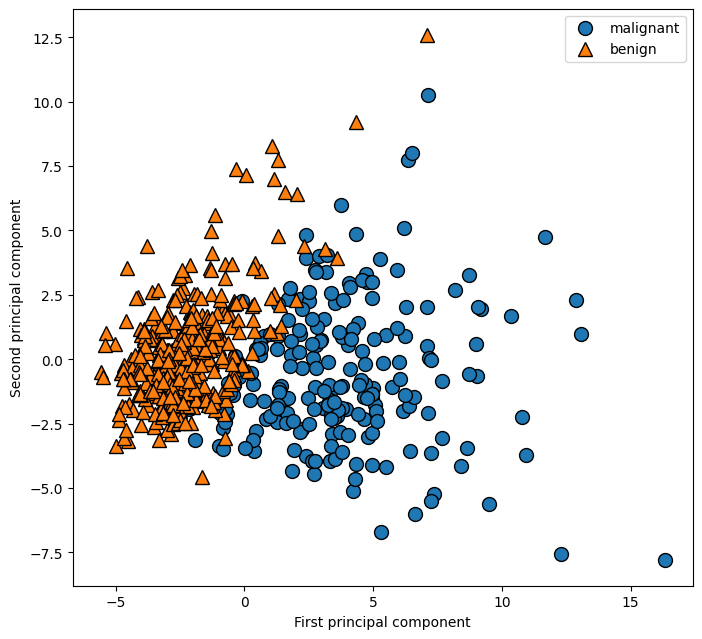

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# first scale the data
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

#transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Shape after PCA: {X_pca.shape}")

# plotting the two principal components

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 3.3 Non-Negative Matrix Factorisation (NMF)

Works similarly to PCA, but only with positive coefficients. This is particularly useful for data that combines several sources such as audio (with multiple people speaking), or music, gene expression, text data.

- With NMF you specify the number of components you want to remove, instead of how many you want. There is also not an order such as with PCA (ie. First component, and so on)
- NFM is best to find patterns in data


## 3.4 Manifold Learning with t-SNE

Algorithm that belongs to a class to a class useful for visualisation.
This is used for exploratory data analysis. It cannot be used on test sets, and it is almost never used in supervised learning problems.
This method has no "transform method", because it doesn't transform the data. So you can fit_transform instead.

What is basically does it to keep points that are close to each other as close as possible, and points that are far from each other, as separate as possible.

# Clustering Algorithms

## 3.5 K-means

K-means assume that all clusters have the same "diameter" in some sense. Even if you know the "correct number of clusters" the algorithm may fail as it works solely based considering the cluster centroids. So K-means performs poorly in datasets with more complex shapes, or when data overlaps each other.

## 3.6 Agglomerative Clustering
Basically these typs of algorithms start by assigning each point to their own cluters, and then proceeds to merging the clusters until a certain number n of clusters is found. The clusters are merged according to certain criteria:

- ward: the default option. Looks for clusters in which the variance increased the least. Often results in clusters of similar sizers.
- average: merges two cluster with the smallest average distance between all their points.
- complete (also knownn as maximum): merges two clusters with the smallest maximum distance between their points.

Ward works well on most datasets. If the data has some clusters which are much bigger/smaller than the others, than average or complete can work better.

This type of algorihtm cannot make predictions for new datapoints, so there is no .predict method. Use fit_predict instead.

You need to specify the number of final clusters you want, which could be difficult to do. If you want some help in visualising to make this choice, you can use the library **Scipy**, and create a **dendogram**. It shows you how the clusters would have been formed, and with the aid of this visual representation you can better inform the optimal number of final clusters.

## 3.7 DBSCAN (density-based spatial clustering of applications with noise)
This algoritm basically groups sessions of the dataset where many points are together (dense sections), and discarts outliers. In principle, you don't need to specify the number of clusters you need.
It works with two main parameters: *eps*  and *min_samples*. Core samples (or core points, points in a dense region), that are closer to each other than the distance eps are put into the same cluster. If the number of points in a region is less than the min_samples, those points will be flagged as "noise".

You cannot make predicitons for new points, so use the method .fit_predict

- The value of -1 of a cluster membership stands for noise.
- increasing *eps* means more points will be included in a cluster. When eps is too low, many points can be flagged a noise, but if it is too high, all points will merge into a single cluster. (default=0.5)
- increasing *min_samples* means less points will be core points.
- if you re-scale the data, the algorithm runs better




Text(0, 0.5, 'Feature 1')

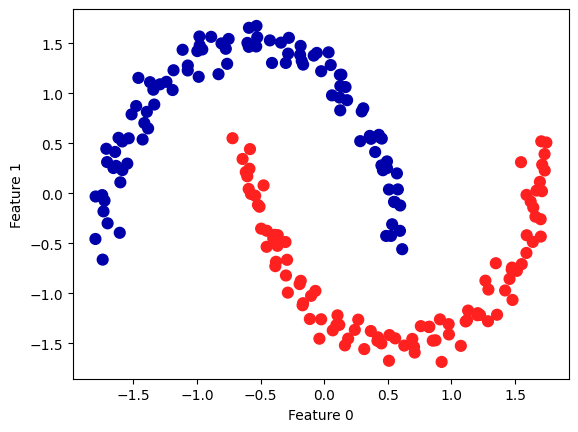

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# creates the dbscan object and fit the data
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")